# TerraBlueXT Assignment 

Importing Required libraries

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
import pandas as pd
import matplotlib.pyplot as plt

# Loading data

In [150]:
#training_data

train=pd.read_csv('D:/important_ds_files/predice-el-futuro/train_csv.csv',index_col="time",parse_dates=["time"] )
train=train.drop('id',axis=1)

In [168]:
train.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


In [175]:
#test_data
test=pd.read_csv('D:/important_ds_files/predice-el-futuro/test_csv.csv',index_col="time",parse_dates=["time"] )
test=test.drop(['id'],axis=1)

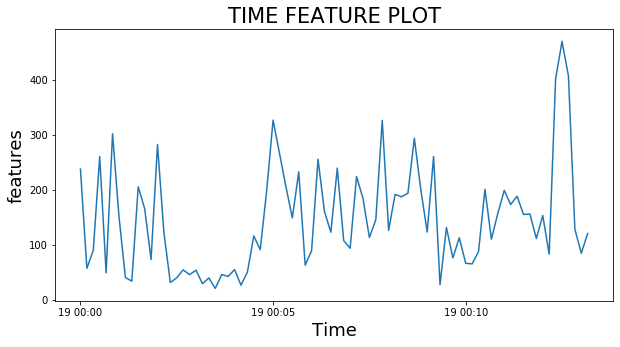

In [183]:
#ploting_time/feature_plot

plt.figure(figsize=(10,5))
plt.title('TIME FEATURE PLOT',fontsize=21)
plt.xlabel('Time',fontsize=18)
plt.ylabel('features',fontsize=18)
plt.plot(train)

# Data preProcessing

In [6]:
def prepare_data(data, n_features):
    X, y =[],[]
    for i in range(len(data)):
        end_ix = i + n_features

        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [69]:
dataset=train.values
data=[]
n_steps=8
for i, j in dataset:
    data.append(j)
X, y = prepare_data(data, n_steps)

In [71]:
X.shape

(72, 8)

X is our training data 
y is our dependent variable

In [72]:
#reshaping training data
X = X.reshape((X.shape[0], X.shape[1],1))

In [73]:
y

array([ 34.61, 205.87, 166.23,  73.75, 282.46, 122.71,  32.04,  40.73,
        55.06,  46.4 ,  54.46,  29.97,  40.43,  21.36,  46.59,  43.11,
        55.62,  27.36,  50.94, 116.61,  91.8 , 198.32, 326.76, 266.69,
       205.95, 149.42, 233.22,  63.63,  89.77, 255.79, 161.08, 123.41,
       239.69, 108.12,  94.31, 224.3 , 184.75, 113.74, 146.06, 326.35,
       126.81, 192.  , 187.7 , 194.04, 293.84, 201.54, 123.67, 260.87,
        28.26, 131.97,  76.73, 113.35,  67.01,  65.89,  88.47, 201.17,
       110.79, 157.37, 199.37, 173.72, 188.69, 155.62, 156.46, 111.91,
       153.83,  83.51, 401.43, 469.72, 406.79, 128.91,  85.28, 121.12])

# Creating Lstm Model 

In [111]:
regressor = Sequential()
## 3 layers and 50 units of lstm celss
regressor.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X, y, epochs=10000, verbose=1,batch_size=12)

Train on 72 samples
Epoch 1/10000
72/72 [==============================] - 5s 65ms/sample - loss: 30631.6732
Epoch 2/10000
72/72 [==============================] - 0s 2ms/sample - loss: 30319.5573
Epoch 3/10000
72/72 [==============================] - 0s 2ms/sample - loss: 29914.4092
Epoch 4/10000
72/72 [==============================] - 0s 2ms/sample - loss: 29420.5378
Epoch 5/10000
72/72 [==============================] - 0s 2ms/sample - loss: 29003.8815
Epoch 6/10000
72/72 [==============================] - 0s 2ms/sample - loss: 28546.6678
Epoch 7/10000
72/72 [==============================] - 0s 2ms/sample - loss: 28254.6768
Epoch 8/10000
72/72 [==============================] - 0s 2ms/sample - loss: 28018.8949
Epoch 9/10000
72/72 [==============================] - 0s 2ms/sample - loss: 27660.5153
Epoch 10/10000
72/72 [==============================] - 0s 2ms/sample - loss: 27599.8481
Epoch 11/10000
72/72 [==============================] - 0s 2ms/sample - loss: 27490.4022
Epoch 12/

72/72 [==============================] - 0s 2ms/sample - loss: 21459.5347
Epoch 93/10000
72/72 [==============================] - 0s 2ms/sample - loss: 21246.8414
Epoch 94/10000
72/72 [==============================] - 0s 2ms/sample - loss: 21198.4456
Epoch 95/10000
72/72 [==============================] - 0s 2ms/sample - loss: 21078.3468
Epoch 96/10000
72/72 [==============================] - 0s 2ms/sample - loss: 21189.4294
Epoch 97/10000
72/72 [==============================] - 0s 2ms/sample - loss: 21093.0083
Epoch 98/10000
72/72 [==============================] - 0s 2ms/sample - loss: 21083.6663
Epoch 99/10000
72/72 [==============================] - 0s 2ms/sample - loss: 21025.2568
Epoch 100/10000
72/72 [==============================] - 0s 2ms/sample - loss: 20900.8288
Epoch 101/10000
72/72 [==============================] - 0s 2ms/sample - loss: 20807.5609
Epoch 102/10000
72/72 [==============================] - 0s 2ms/sample - loss: 20877.9204
Epoch 103/10000
72/72 [==========

72/72 [==============================] - 0s 2ms/sample - loss: 16798.0339
Epoch 183/10000
72/72 [==============================] - 0s 2ms/sample - loss: 16769.6150
Epoch 184/10000
72/72 [==============================] - 0s 2ms/sample - loss: 16723.8987
Epoch 185/10000
72/72 [==============================] - 0s 2ms/sample - loss: 16726.8291
Epoch 186/10000
72/72 [==============================] - 0s 2ms/sample - loss: 16632.3447
Epoch 187/10000
72/72 [==============================] - 0s 2ms/sample - loss: 16418.1764
Epoch 188/10000
72/72 [==============================] - 0s 2ms/sample - loss: 16629.7233
Epoch 189/10000
72/72 [==============================] - 0s 2ms/sample - loss: 16661.3650
Epoch 190/10000
72/72 [==============================] - 0s 2ms/sample - loss: 16405.3535
Epoch 191/10000
72/72 [==============================] - 0s 2ms/sample - loss: 16725.6650
Epoch 192/10000
72/72 [==============================] - 0s 2ms/sample - loss: 16231.6024
Epoch 193/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 13701.7564
Epoch 273/10000
72/72 [==============================] - 0s 2ms/sample - loss: 13727.5455
Epoch 274/10000
72/72 [==============================] - 0s 2ms/sample - loss: 13783.3136
Epoch 275/10000
72/72 [==============================] - 0s 2ms/sample - loss: 13836.0578
Epoch 276/10000
72/72 [==============================] - 0s 2ms/sample - loss: 13652.9106
Epoch 277/10000
72/72 [==============================] - 0s 2ms/sample - loss: 13545.5785
Epoch 278/10000
72/72 [==============================] - 0s 2ms/sample - loss: 13506.4711
Epoch 279/10000
72/72 [==============================] - 0s 2ms/sample - loss: 13704.9443
Epoch 280/10000
72/72 [==============================] - 0s 2ms/sample - loss: 13460.5898
Epoch 281/10000
72/72 [==============================] - 0s 2ms/sample - loss: 13466.9639
Epoch 282/10000
72/72 [==============================] - 0s 2ms/sample - loss: 13234.7775
Epoch 283/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 11512.4563
Epoch 364/10000
72/72 [==============================] - 0s 2ms/sample - loss: 11645.7895
Epoch 365/10000
72/72 [==============================] - 0s 2ms/sample - loss: 11620.3273
Epoch 366/10000
72/72 [==============================] - 0s 2ms/sample - loss: 11714.0498
Epoch 367/10000
72/72 [==============================] - 0s 2ms/sample - loss: 11562.4328
Epoch 368/10000
72/72 [==============================] - 0s 2ms/sample - loss: 11470.9241
Epoch 369/10000
72/72 [==============================] - 0s 2ms/sample - loss: 11526.1560
Epoch 370/10000
72/72 [==============================] - 0s 2ms/sample - loss: 11407.3448
Epoch 371/10000
72/72 [==============================] - 0s 2ms/sample - loss: 11779.0463
Epoch 372/10000
72/72 [==============================] - 0s 2ms/sample - loss: 11508.5458
Epoch 373/10000
72/72 [==============================] - 0s 2ms/sample - loss: 11466.5511
Epoch 374/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 10372.5006
Epoch 455/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10335.3858
Epoch 456/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10536.3260
Epoch 457/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10342.6557
Epoch 458/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10223.5460
Epoch 459/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10385.1832
Epoch 460/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10172.7308
Epoch 461/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10401.7641
Epoch 462/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10056.9005
Epoch 463/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10503.3244
Epoch 464/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10137.9000
Epoch 465/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 9447.0422
Epoch 546/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9673.1607
Epoch 547/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9657.8266
Epoch 548/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9544.7378
Epoch 549/10000
72/72 [==============================] - 0s 2ms/sample - loss: 10019.6613
Epoch 550/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9581.1195
Epoch 551/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9573.5361
Epoch 552/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9768.1077
Epoch 553/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9589.2845
Epoch 554/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9823.8149
Epoch 555/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9768.5345
Epoch 556/10000
72/72 [=============

72/72 [==============================] - 0s 2ms/sample - loss: 9400.2417
Epoch 638/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9238.1337
Epoch 639/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9306.0124
Epoch 640/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9540.2450
Epoch 641/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9835.3190
Epoch 642/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9353.5585
Epoch 643/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9513.9913
Epoch 644/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9534.0759
Epoch 645/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9711.4485
Epoch 646/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9457.2833
Epoch 647/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9581.5426
Epoch 648/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 9476.8598
Epoch 730/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9313.9904
Epoch 731/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9684.8266
Epoch 732/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9847.6510
Epoch 733/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9493.4238
Epoch 734/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9275.3042
Epoch 735/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9699.0657
Epoch 736/10000
72/72 [==============================] - 0s 2ms/sample - loss: 8918.4586
Epoch 737/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9644.9616
Epoch 738/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9745.5329
Epoch 739/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9274.7673
Epoch 740/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 9325.0228
Epoch 822/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9354.9308
Epoch 823/10000
72/72 [==============================] - 0s 2ms/sample - loss: 8991.9165
Epoch 824/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9175.3135
Epoch 825/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9312.3995
Epoch 826/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9571.2241
Epoch 827/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9778.7716
Epoch 828/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9858.9596
Epoch 829/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9573.8701
Epoch 830/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9298.4732
Epoch 831/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9044.6483
Epoch 832/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 8995.4009
Epoch 914/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9615.6357
Epoch 915/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9205.6855
Epoch 916/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9431.3932
Epoch 917/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9285.0444
Epoch 918/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9223.6611
Epoch 919/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9074.3130
Epoch 920/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9252.1117
Epoch 921/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9591.5103
Epoch 922/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9045.4971
Epoch 923/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9751.5942
Epoch 924/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 9005.2437
Epoch 1006/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9008.4349
Epoch 1007/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9611.0151
Epoch 1008/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9235.2976
Epoch 1009/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9042.6072
Epoch 1010/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9337.7603
Epoch 1011/10000
72/72 [==============================] - 0s 2ms/sample - loss: 8924.2994
Epoch 1012/10000
72/72 [==============================] - 0s 2ms/sample - loss: 8949.8079
Epoch 1013/10000
72/72 [==============================] - 0s 2ms/sample - loss: 9065.3236
Epoch 1014/10000
72/72 [==============================] - 0s 2ms/sample - loss: 8723.1152
Epoch 1015/10000
72/72 [==============================] - 0s 2ms/sample - loss: 8825.4132
Epoch 1016/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 6676.9977
Epoch 1097/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6742.9999
Epoch 1098/10000
72/72 [==============================] - 0s 2ms/sample - loss: 7004.8669
Epoch 1099/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6256.7829
Epoch 1100/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6687.7785
Epoch 1101/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6560.0450
Epoch 1102/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6832.7872
Epoch 1103/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6776.6244
Epoch 1104/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6861.8712
Epoch 1105/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6888.9228
Epoch 1106/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6800.3107
Epoch 1107/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 6539.8116
Epoch 1188/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5845.2522
Epoch 1189/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5740.3817
Epoch 1190/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5920.7651
Epoch 1191/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6084.7743
Epoch 1192/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6085.6667
Epoch 1193/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6012.5131
Epoch 1194/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6143.6811
Epoch 1195/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6446.6606
Epoch 1196/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5901.0730
Epoch 1197/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5735.2591
Epoch 1198/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 6037.1438
Epoch 1279/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5862.3846
Epoch 1280/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5087.3545
Epoch 1281/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6419.7103
Epoch 1282/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6374.8006
Epoch 1283/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6092.8571
Epoch 1284/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5683.8644
Epoch 1285/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5964.6460
Epoch 1286/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6007.4593
Epoch 1287/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6363.7822
Epoch 1288/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5919.8834
Epoch 1289/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 5765.1596
Epoch 1370/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6253.7969
Epoch 1371/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5781.6972
Epoch 1372/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5700.7860
Epoch 1373/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5668.5257
Epoch 1374/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6653.1635
Epoch 1375/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5543.3041
Epoch 1376/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5875.4670
Epoch 1377/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5430.5444
Epoch 1378/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5919.8790
Epoch 1379/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5620.4694
Epoch 1380/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 6234.3446
Epoch 1461/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5650.9976
Epoch 1462/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5626.4890
Epoch 1463/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5780.3028
Epoch 1464/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5583.8573
Epoch 1465/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5418.0474
Epoch 1466/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5467.3526
Epoch 1467/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6289.5355
Epoch 1468/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6166.0974
Epoch 1469/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5013.0280
Epoch 1470/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5344.0938
Epoch 1471/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 5078.0108
Epoch 1551/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5411.0629
Epoch 1552/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5132.9143
Epoch 1553/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6055.4545
Epoch 1554/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5040.3385
Epoch 1555/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5427.2913
Epoch 1556/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5769.5424
Epoch 1557/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5091.6896
Epoch 1558/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5565.2489
Epoch 1559/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5428.2794
Epoch 1560/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5258.2234
Epoch 1561/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 5656.3350
Epoch 1642/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5119.2682
Epoch 1643/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5286.8058
Epoch 1644/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5086.7018
Epoch 1645/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5303.2202
Epoch 1646/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5314.8152
Epoch 1647/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4823.0166
Epoch 1648/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5897.2293
Epoch 1649/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5069.7615
Epoch 1650/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4616.1631
Epoch 1651/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5288.3419
Epoch 1652/10000
72/72 [===

Epoch 1732/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5551.7411
Epoch 1733/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5157.4470
Epoch 1734/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5067.8235
Epoch 1735/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5127.1618
Epoch 1736/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5400.8279
Epoch 1737/10000
72/72 [==============================] - 0s 2ms/sample - loss: 6133.9435
Epoch 1738/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5590.4331
Epoch 1739/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5607.6081
Epoch 1740/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5727.6958
Epoch 1741/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4798.2251
Epoch 1742/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5451.8227
Epoch 1743

72/72 [==============================] - 0s 2ms/sample - loss: 4590.6734
Epoch 1823/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5199.1217
Epoch 1824/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4991.3415
Epoch 1825/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4840.0433
Epoch 1826/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4793.9263
Epoch 1827/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4707.7583
Epoch 1828/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4968.3507
Epoch 1829/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4910.5410
Epoch 1830/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4288.3753
Epoch 1831/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5354.5133
Epoch 1832/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4799.0891
Epoch 1833/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 4216.4883
Epoch 1914/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4112.4515
Epoch 1915/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5094.3408
Epoch 1916/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4518.6251
Epoch 1917/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4429.2335
Epoch 1918/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4689.0241
Epoch 1919/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4300.7870
Epoch 1920/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3882.9026
Epoch 1921/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4557.3067
Epoch 1922/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4524.7307
Epoch 1923/10000
72/72 [==============================] - 0s 2ms/sample - loss: 5055.3781
Epoch 1924/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 3891.1547
Epoch 2005/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3925.1451
Epoch 2006/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3829.1448
Epoch 2007/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3869.8795
Epoch 2008/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4295.8623
Epoch 2009/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3622.1688
Epoch 2010/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3823.4575
Epoch 2011/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4098.6565
Epoch 2012/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3919.8472
Epoch 2013/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4204.4772
Epoch 2014/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3831.9560
Epoch 2015/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 3917.8834
Epoch 2096/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3987.2765
Epoch 2097/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3616.0239
Epoch 2098/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3705.8866
Epoch 2099/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3329.1215
Epoch 2100/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3341.5852
Epoch 2101/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4542.0388
Epoch 2102/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3749.5527
Epoch 2103/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3865.1627
Epoch 2104/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4060.1161
Epoch 2105/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3747.1026
Epoch 2106/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 2838.3162
Epoch 2187/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3002.3486
Epoch 2188/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3941.1077
Epoch 2189/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3815.9895
Epoch 2190/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3480.8289
Epoch 2191/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3867.6784
Epoch 2192/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3462.7528
Epoch 2193/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3380.7843
Epoch 2194/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3838.6172
Epoch 2195/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2851.8861
Epoch 2196/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3234.4141
Epoch 2197/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 3098.1004
Epoch 2278/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3232.5053
Epoch 2279/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3003.2730
Epoch 2280/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2906.7436
Epoch 2281/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2775.5274
Epoch 2282/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2964.3084
Epoch 2283/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2755.7629
Epoch 2284/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2804.9934
Epoch 2285/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2905.3434
Epoch 2286/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2619.1070
Epoch 2287/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2843.0858
Epoch 2288/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 3362.7792
Epoch 2369/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3004.2362
Epoch 2370/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2604.9862
Epoch 2371/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3241.3657
Epoch 2372/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3084.7083
Epoch 2373/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2830.9868
Epoch 2374/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3015.9962
Epoch 2375/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3209.5187
Epoch 2376/10000
72/72 [==============================] - 0s 1ms/sample - loss: 3404.8876
Epoch 2377/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2903.7579
Epoch 2378/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2959.5041
Epoch 2379/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 3100.1949
Epoch 2460/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2654.1298
Epoch 2461/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2764.2271
Epoch 2462/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2696.1691
Epoch 2463/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2757.3656
Epoch 2464/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2927.7776
Epoch 2465/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3012.6488
Epoch 2466/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2753.1132
Epoch 2467/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2797.4101
Epoch 2468/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2636.4451
Epoch 2469/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3448.7580
Epoch 2470/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 2714.2127
Epoch 2551/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3369.6534
Epoch 2552/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2199.1507
Epoch 2553/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2435.1466
Epoch 2554/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3101.8320
Epoch 2555/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3343.9301
Epoch 2556/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2604.3249
Epoch 2557/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2995.0940
Epoch 2558/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3089.6624
Epoch 2559/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2949.9875
Epoch 2560/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2581.8500
Epoch 2561/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 2052.8786
Epoch 2642/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1818.4144
Epoch 2643/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3082.0597
Epoch 2644/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2547.2352
Epoch 2645/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2495.6559
Epoch 2646/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2629.5559
Epoch 2647/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2395.2273
Epoch 2648/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2255.8669
Epoch 2649/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3647.5152
Epoch 2650/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2443.3661
Epoch 2651/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2694.4829
Epoch 2652/10000
72/72 [===

Epoch 2732/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2709.8869
Epoch 2733/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2115.3986
Epoch 2734/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2575.6425
Epoch 2735/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2297.9108
Epoch 2736/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2677.8047
Epoch 2737/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2251.9028
Epoch 2738/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4089.3675
Epoch 2739/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2476.9668
Epoch 2740/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2730.1583
Epoch 2741/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2551.8222
Epoch 2742/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2598.0920
Epoch 2743

72/72 [==============================] - 0s 2ms/sample - loss: 1966.8866
Epoch 2824/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2299.2597
Epoch 2825/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2159.9022
Epoch 2826/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2317.4963
Epoch 2827/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1915.1840
Epoch 2828/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2578.6825
Epoch 2829/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2587.9446
Epoch 2830/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1870.3404
Epoch 2831/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2784.0021
Epoch 2832/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2292.0500
Epoch 2833/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3002.2569
Epoch 2834/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 1758.6926
Epoch 2915/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2004.6628
Epoch 2916/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1812.5326
Epoch 2917/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2288.9729
Epoch 2918/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2441.4043
Epoch 2919/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2188.3726
Epoch 2920/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2322.3826
Epoch 2921/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2060.1952
Epoch 2922/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1802.2100
Epoch 2923/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2210.2725
Epoch 2924/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1671.2057
Epoch 2925/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 1702.0451
Epoch 3006/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2009.6419
Epoch 3007/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1739.6505
Epoch 3008/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1904.7921
Epoch 3009/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2348.1428
Epoch 3010/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2051.5249
Epoch 3011/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2075.4467
Epoch 3012/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2013.4389
Epoch 3013/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1631.9055
Epoch 3014/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1790.0674
Epoch 3015/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1496.5892
Epoch 3016/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 3732.6492
Epoch 3097/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2063.1680
Epoch 3098/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1720.3949
Epoch 3099/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1898.2856
Epoch 3100/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1756.0803
Epoch 3101/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1281.2826
Epoch 3102/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2098.0628
Epoch 3103/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1569.9354
Epoch 3104/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1545.9388
Epoch 3105/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1401.5951
Epoch 3106/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1734.0710
Epoch 3107/10000
72/72 [===

Epoch 3187/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1609.4777
Epoch 3188/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1269.8175
Epoch 3189/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2173.7871
Epoch 3190/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1519.5250
Epoch 3191/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1039.6706
Epoch 3192/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1297.6472
Epoch 3193/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1547.5838
Epoch 3194/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1726.4818
Epoch 3195/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1395.2407
Epoch 3196/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1589.1441
Epoch 3197/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1528.3670
Epoch 3198

72/72 [==============================] - 0s 2ms/sample - loss: 2256.1002
Epoch 3278/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2230.0767
Epoch 3279/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2455.1178
Epoch 3280/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1625.7676
Epoch 3281/10000
72/72 [==============================] - 0s 1ms/sample - loss: 1699.7430
Epoch 3282/10000
72/72 [==============================] - ETA: 0s - loss: 1076.32 - 0s 2ms/sample - loss: 1353.1822
Epoch 3283/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1882.8530
Epoch 3284/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1650.1234
Epoch 3285/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1998.7683
Epoch 3286/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1516.6458
Epoch 3287/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1811.0846
E

Epoch 3368/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2147.7305
Epoch 3369/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1198.4310
Epoch 3370/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1440.1689
Epoch 3371/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1316.0016
Epoch 3372/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1403.5500
Epoch 3373/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1649.8009
Epoch 3374/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1477.7607
Epoch 3375/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1998.8695
Epoch 3376/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1147.6381
Epoch 3377/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1057.9536
Epoch 3378/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1464.1282
Epoch 3379

72/72 [==============================] - 0s 2ms/sample - loss: 1877.2701
Epoch 3459/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1267.3020
Epoch 3460/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1282.6148
Epoch 3461/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1030.8038
Epoch 3462/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1493.4720
Epoch 3463/10000
72/72 [==============================] - 0s 2ms/sample - loss: 972.2790
Epoch 3464/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1328.9240
Epoch 3465/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1971.3714
Epoch 3466/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1841.0007
Epoch 3467/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1472.6830
Epoch 3468/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1102.7103
Epoch 3469/10000
72/72 [====

72/72 [==============================] - 0s 2ms/sample - loss: 955.2459
Epoch 3550/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1221.9402
Epoch 3551/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1301.1789
Epoch 3552/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1365.3132
Epoch 3553/10000
72/72 [==============================] - 0s 2ms/sample - loss: 972.3694
Epoch 3554/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1347.9808
Epoch 3555/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1020.3010
Epoch 3556/10000
72/72 [==============================] - 0s 2ms/sample - loss: 854.6390
Epoch 3557/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1273.5569
Epoch 3558/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1199.6457
Epoch 3559/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1143.0437
Epoch 3560/10000
72/72 [======

72/72 [==============================] - 0s 2ms/sample - loss: 1255.3274
Epoch 3640/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1417.3724
Epoch 3641/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1193.7732
Epoch 3642/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1938.3216
Epoch 3643/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1330.8481
Epoch 3644/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1061.1472
Epoch 3645/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1446.2642
Epoch 3646/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1626.8709
Epoch 3647/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1084.3145
Epoch 3648/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1304.5400
Epoch 3649/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1409.9072
Epoch 3650/10000
72/72 [===

72/72 [==============================] - 0s 2ms/sample - loss: 769.6631
Epoch 3731/10000
72/72 [==============================] - 0s 2ms/sample - loss: 960.3679
Epoch 3732/10000
72/72 [==============================] - 0s 2ms/sample - loss: 867.4193
Epoch 3733/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1251.8979
Epoch 3734/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1809.7978
Epoch 3735/10000
72/72 [==============================] - 0s 2ms/sample - loss: 954.0330
Epoch 3736/10000
72/72 [==============================] - 0s 2ms/sample - loss: 885.3456
Epoch 3737/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1410.0627
Epoch 3738/10000
72/72 [==============================] - 0s 2ms/sample - loss: 929.6881
Epoch 3739/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1770.5274
Epoch 3740/10000
72/72 [==============================] - 0s 2ms/sample - loss: 998.9533
Epoch 3741/10000
72/72 [==========

72/72 [==============================] - 0s 2ms/sample - loss: 1016.1046
Epoch 3822/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1309.3824
Epoch 3823/10000
72/72 [==============================] - 0s 2ms/sample - loss: 856.6014
Epoch 3824/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1310.3547
Epoch 3825/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1177.7972
Epoch 3826/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1437.3218
Epoch 3827/10000
72/72 [==============================] - 0s 2ms/sample - loss: 848.9899
Epoch 3828/10000
72/72 [==============================] - 0s 2ms/sample - loss: 874.6398
Epoch 3829/10000
72/72 [==============================] - 0s 2ms/sample - loss: 907.9850
Epoch 3830/10000
72/72 [==============================] - 0s 2ms/sample - loss: 994.6192
Epoch 3831/10000
72/72 [==============================] - 0s 2ms/sample - loss: 939.9655
Epoch 3832/10000
72/72 [=========

72/72 [==============================] - 0s 1ms/sample - loss: 1000.4972
Epoch 3913/10000
72/72 [==============================] - 0s 2ms/sample - loss: 885.1524
Epoch 3914/10000
72/72 [==============================] - 0s 2ms/sample - loss: 971.7067
Epoch 3915/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1077.0879
Epoch 3916/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1318.6766
Epoch 3917/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1072.1371
Epoch 3918/10000
72/72 [==============================] - 0s 2ms/sample - loss: 840.5631
Epoch 3919/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1011.0936
Epoch 3920/10000
72/72 [==============================] - 0s 2ms/sample - loss: 568.6381
Epoch 3921/10000
72/72 [==============================] - 0s 2ms/sample - loss: 627.2445
Epoch 3922/10000
72/72 [==============================] - 0s 2ms/sample - loss: 776.6017
Epoch 3923/10000
72/72 [=========

72/72 [==============================] - 0s 2ms/sample - loss: 1437.3403
Epoch 4004/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1184.1920
Epoch 4005/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1521.8291
Epoch 4006/10000
72/72 [==============================] - 0s 2ms/sample - loss: 873.1607
Epoch 4007/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1569.9073
Epoch 4008/10000
72/72 [==============================] - 0s 2ms/sample - loss: 925.0942
Epoch 4009/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1117.1937
Epoch 4010/10000
72/72 [==============================] - 0s 2ms/sample - loss: 894.5661
Epoch 4011/10000
72/72 [==============================] - 0s 2ms/sample - loss: 691.4527
Epoch 4012/10000
72/72 [==============================] - 0s 2ms/sample - loss: 853.8566
Epoch 4013/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1053.9021
Epoch 4014/10000
72/72 [========

72/72 [==============================] - 0s 2ms/sample - loss: 843.3735
Epoch 4095/10000
72/72 [==============================] - 0s 2ms/sample - loss: 831.4265
Epoch 4096/10000
72/72 [==============================] - 0s 2ms/sample - loss: 908.6748
Epoch 4097/10000
72/72 [==============================] - 0s 2ms/sample - loss: 829.8008
Epoch 4098/10000
72/72 [==============================] - 0s 2ms/sample - loss: 851.7108
Epoch 4099/10000
72/72 [==============================] - 0s 2ms/sample - loss: 946.9327
Epoch 4100/10000
72/72 [==============================] - 0s 2ms/sample - loss: 996.2265
Epoch 4101/10000
72/72 [==============================] - 0s 2ms/sample - loss: 818.7855
Epoch 4102/10000
72/72 [==============================] - 0s 2ms/sample - loss: 689.4221
Epoch 4103/10000
72/72 [==============================] - 0s 2ms/sample - loss: 715.6196
Epoch 4104/10000
72/72 [==============================] - 0s 2ms/sample - loss: 799.7713
Epoch 4105/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 2507.9085
Epoch 4186/10000
72/72 [==============================] - 0s 2ms/sample - loss: 4942.2461
Epoch 4187/10000
72/72 [==============================] - 0s 2ms/sample - loss: 3379.1397
Epoch 4188/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2143.1434
Epoch 4189/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1884.9873
Epoch 4190/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2455.6262
Epoch 4191/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2226.4266
Epoch 4192/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1776.1944
Epoch 4193/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2765.1829
Epoch 4194/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1915.1160
Epoch 4195/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2446.3289
Epoch 4196/10000
72/72 [===

Epoch 4276/10000
72/72 [==============================] - 0s 2ms/sample - loss: 976.2160
Epoch 4277/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1170.9078
Epoch 4278/10000
72/72 [==============================] - 0s 2ms/sample - loss: 946.6520
Epoch 4279/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1148.6091
Epoch 4280/10000
72/72 [==============================] - 0s 2ms/sample - loss: 961.9953
Epoch 4281/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1263.4241
Epoch 4282/10000
72/72 [==============================] - 0s 2ms/sample - loss: 883.2142
Epoch 4283/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1630.4151
Epoch 4284/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1173.9924
Epoch 4285/10000
72/72 [==============================] - 0s 2ms/sample - loss: 936.3024
Epoch 4286/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1218.7439
Epoch 4287/1000

72/72 [==============================] - 0s 2ms/sample - loss: 593.3364
Epoch 4368/10000
72/72 [==============================] - 0s 2ms/sample - loss: 725.5923
Epoch 4369/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1349.3544
Epoch 4370/10000
72/72 [==============================] - 0s 2ms/sample - loss: 803.5472
Epoch 4371/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1291.9330
Epoch 4372/10000
72/72 [==============================] - 0s 2ms/sample - loss: 652.9273
Epoch 4373/10000
72/72 [==============================] - 0s 2ms/sample - loss: 604.0424
Epoch 4374/10000
72/72 [==============================] - 0s 2ms/sample - loss: 677.4793
Epoch 4375/10000
72/72 [==============================] - 0s 2ms/sample - loss: 966.9678
Epoch 4376/10000
72/72 [==============================] - 0s 2ms/sample - loss: 453.1491
Epoch 4377/10000
72/72 [==============================] - 0s 2ms/sample - loss: 925.5513
Epoch 4378/10000
72/72 [============

72/72 [==============================] - 0s 2ms/sample - loss: 934.9646
Epoch 4459/10000
72/72 [==============================] - 0s 2ms/sample - loss: 764.9392
Epoch 4460/10000
72/72 [==============================] - 0s 2ms/sample - loss: 935.0956
Epoch 4461/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1005.8649
Epoch 4462/10000
72/72 [==============================] - 0s 2ms/sample - loss: 463.3502
Epoch 4463/10000
72/72 [==============================] - 0s 2ms/sample - loss: 632.5033
Epoch 4464/10000
72/72 [==============================] - 0s 2ms/sample - loss: 631.3451
Epoch 4465/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1141.4719
Epoch 4466/10000
72/72 [==============================] - 0s 2ms/sample - loss: 797.9155
Epoch 4467/10000
72/72 [==============================] - 0s 2ms/sample - loss: 558.2470
Epoch 4468/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1400.7616
Epoch 4469/10000
72/72 [===========

Epoch 4550/10000
72/72 [==============================] - 0s 2ms/sample - loss: 576.0957
Epoch 4551/10000
72/72 [==============================] - 0s 2ms/sample - loss: 742.5763
Epoch 4552/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1850.1474
Epoch 4553/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1558.6449
Epoch 4554/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1288.8024
Epoch 4555/10000
72/72 [==============================] - 0s 2ms/sample - loss: 851.9648
Epoch 4556/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1103.1512
Epoch 4557/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1665.3387
Epoch 4558/10000
72/72 [==============================] - 0s 2ms/sample - loss: 604.2028
Epoch 4559/10000
72/72 [==============================] - 0s 2ms/sample - loss: 712.7516
Epoch 4560/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1144.6819
Epoch 4561/1000

72/72 [==============================] - 0s 2ms/sample - loss: 687.0434
Epoch 4642/10000
72/72 [==============================] - 0s 2ms/sample - loss: 804.8512
Epoch 4643/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1013.7999
Epoch 4644/10000
72/72 [==============================] - 0s 2ms/sample - loss: 787.6657
Epoch 4645/10000
72/72 [==============================] - 0s 2ms/sample - loss: 624.0974
Epoch 4646/10000
72/72 [==============================] - 0s 2ms/sample - loss: 825.6277
Epoch 4647/10000
72/72 [==============================] - 0s 2ms/sample - loss: 844.9334
Epoch 4648/10000
72/72 [==============================] - 0s 2ms/sample - loss: 573.2909
Epoch 4649/10000
72/72 [==============================] - 0s 2ms/sample - loss: 577.0215
Epoch 4650/10000
72/72 [==============================] - 0s 2ms/sample - loss: 611.2542
Epoch 4651/10000
72/72 [==============================] - 0s 2ms/sample - loss: 974.7038
Epoch 4652/10000
72/72 [=============

72/72 [==============================] - 0s 2ms/sample - loss: 546.1843
Epoch 4734/10000
72/72 [==============================] - 0s 2ms/sample - loss: 856.6164
Epoch 4735/10000
72/72 [==============================] - 0s 2ms/sample - loss: 717.4750
Epoch 4736/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1384.2187
Epoch 4737/10000
72/72 [==============================] - 0s 2ms/sample - loss: 568.3957
Epoch 4738/10000
72/72 [==============================] - 0s 2ms/sample - loss: 580.7572
Epoch 4739/10000
72/72 [==============================] - 0s 2ms/sample - loss: 907.9615
Epoch 4740/10000
72/72 [==============================] - 0s 2ms/sample - loss: 700.0309
Epoch 4741/10000
72/72 [==============================] - 0s 2ms/sample - loss: 667.1239
Epoch 4742/10000
72/72 [==============================] - 0s 2ms/sample - loss: 687.5486
Epoch 4743/10000
72/72 [==============================] - 0s 2ms/sample - loss: 597.9454
Epoch 4744/10000
72/72 [=============

Epoch 4825/10000
72/72 [==============================] - 0s 2ms/sample - loss: 735.6830
Epoch 4826/10000
72/72 [==============================] - 0s 2ms/sample - loss: 363.6157
Epoch 4827/10000
72/72 [==============================] - 0s 2ms/sample - loss: 611.1713
Epoch 4828/10000
72/72 [==============================] - 0s 2ms/sample - loss: 502.6993
Epoch 4829/10000
72/72 [==============================] - 0s 2ms/sample - loss: 949.9580
Epoch 4830/10000
72/72 [==============================] - 0s 2ms/sample - loss: 940.7742
Epoch 4831/10000
72/72 [==============================] - 0s 2ms/sample - loss: 610.6327
Epoch 4832/10000
72/72 [==============================] - 0s 2ms/sample - loss: 737.1655
Epoch 4833/10000
72/72 [==============================] - 0s 2ms/sample - loss: 428.8057
Epoch 4834/10000
72/72 [==============================] - 0s 2ms/sample - loss: 562.1475
Epoch 4835/10000
72/72 [==============================] - 0s 2ms/sample - loss: 892.6507
Epoch 4836/10000
72/7

72/72 [==============================] - 0s 2ms/sample - loss: 1429.2306
Epoch 4917/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1090.9331
Epoch 4918/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1253.2719
Epoch 4919/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1414.3735
Epoch 4920/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1595.1024
Epoch 4921/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1551.1480
Epoch 4922/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1237.7309
Epoch 4923/10000
72/72 [==============================] - 0s 2ms/sample - loss: 833.7858
Epoch 4924/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1048.9432
Epoch 4925/10000
72/72 [==============================] - 0s 2ms/sample - loss: 685.1183
Epoch 4926/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1128.9656
Epoch 4927/10000
72/72 [=====

72/72 [==============================] - 0s 2ms/sample - loss: 1187.9054
Epoch 5008/10000
72/72 [==============================] - 0s 2ms/sample - loss: 751.1712
Epoch 5009/10000
72/72 [==============================] - 0s 2ms/sample - loss: 799.5656
Epoch 5010/10000
72/72 [==============================] - 0s 2ms/sample - loss: 904.8254
Epoch 5011/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1080.5401
Epoch 5012/10000
72/72 [==============================] - 0s 2ms/sample - loss: 753.6703
Epoch 5013/10000
72/72 [==============================] - 0s 2ms/sample - loss: 699.6453
Epoch 5014/10000
72/72 [==============================] - 0s 2ms/sample - loss: 544.1173
Epoch 5015/10000
72/72 [==============================] - 0s 2ms/sample - loss: 852.7138
Epoch 5016/10000
72/72 [==============================] - 0s 2ms/sample - loss: 776.9825
Epoch 5017/10000
72/72 [==============================] - 0s 2ms/sample - loss: 596.5200
Epoch 5018/10000
72/72 [============

72/72 [==============================] - 0s 2ms/sample - loss: 569.8272
Epoch 5100/10000
72/72 [==============================] - 0s 2ms/sample - loss: 552.0748
Epoch 5101/10000
72/72 [==============================] - 0s 2ms/sample - loss: 912.4668
Epoch 5102/10000
72/72 [==============================] - 0s 2ms/sample - loss: 782.8756
Epoch 5103/10000
72/72 [==============================] - 0s 2ms/sample - loss: 637.9700
Epoch 5104/10000
72/72 [==============================] - 0s 2ms/sample - loss: 694.1508
Epoch 5105/10000
72/72 [==============================] - 0s 2ms/sample - loss: 554.3661
Epoch 5106/10000
72/72 [==============================] - 0s 2ms/sample - loss: 788.4400
Epoch 5107/10000
72/72 [==============================] - 0s 2ms/sample - loss: 407.9605
Epoch 5108/10000
72/72 [==============================] - 0s 2ms/sample - loss: 659.1939
Epoch 5109/10000
72/72 [==============================] - 0s 2ms/sample - loss: 393.3748
Epoch 5110/10000
72/72 [==============

Epoch 5191/10000
72/72 [==============================] - 0s 2ms/sample - loss: 410.4546
Epoch 5192/10000
72/72 [==============================] - 0s 2ms/sample - loss: 642.2669
Epoch 5193/10000
72/72 [==============================] - 0s 2ms/sample - loss: 684.9207
Epoch 5194/10000
72/72 [==============================] - 0s 2ms/sample - loss: 753.6280
Epoch 5195/10000
72/72 [==============================] - 0s 2ms/sample - loss: 460.0052
Epoch 5196/10000
72/72 [==============================] - 0s 2ms/sample - loss: 619.4737
Epoch 5197/10000
72/72 [==============================] - 0s 2ms/sample - loss: 974.3923
Epoch 5198/10000
72/72 [==============================] - 0s 2ms/sample - loss: 788.3673
Epoch 5199/10000
72/72 [==============================] - 0s 2ms/sample - loss: 589.7023
Epoch 5200/10000
72/72 [==============================] - 0s 2ms/sample - loss: 639.3483
Epoch 5201/10000
72/72 [==============================] - 0s 2ms/sample - loss: 767.0202
Epoch 5202/10000
72/7

Epoch 5283/10000
72/72 [==============================] - 0s 2ms/sample - loss: 382.9447
Epoch 5284/10000
72/72 [==============================] - 0s 2ms/sample - loss: 408.3989
Epoch 5285/10000
72/72 [==============================] - 0s 2ms/sample - loss: 470.9313
Epoch 5286/10000
72/72 [==============================] - 0s 2ms/sample - loss: 699.4420
Epoch 5287/10000
72/72 [==============================] - 0s 2ms/sample - loss: 916.7010
Epoch 5288/10000
72/72 [==============================] - 0s 2ms/sample - loss: 656.4520
Epoch 5289/10000
72/72 [==============================] - 0s 2ms/sample - loss: 553.5218
Epoch 5290/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1620.8673
Epoch 5291/10000
72/72 [==============================] - 0s 2ms/sample - loss: 528.0059
Epoch 5292/10000
72/72 [==============================] - 0s 2ms/sample - loss: 527.2648
Epoch 5293/10000
72/72 [==============================] - 0s 2ms/sample - loss: 718.5835
Epoch 5294/10000
72/

72/72 [==============================] - 0s 2ms/sample - loss: 1445.7376
Epoch 5375/10000
72/72 [==============================] - 0s 2ms/sample - loss: 594.6996
Epoch 5376/10000
72/72 [==============================] - 0s 2ms/sample - loss: 830.9219
Epoch 5377/10000
72/72 [==============================] - 0s 2ms/sample - loss: 502.4256
Epoch 5378/10000
72/72 [==============================] - 0s 2ms/sample - loss: 513.0242
Epoch 5379/10000
72/72 [==============================] - 0s 2ms/sample - loss: 678.2956
Epoch 5380/10000
72/72 [==============================] - 0s 2ms/sample - loss: 548.7625
Epoch 5381/10000
72/72 [==============================] - 0s 2ms/sample - loss: 606.5251
Epoch 5382/10000
72/72 [==============================] - 0s 2ms/sample - loss: 860.7930
Epoch 5383/10000
72/72 [==============================] - 0s 2ms/sample - loss: 445.8443
Epoch 5384/10000
72/72 [==============================] - 0s 2ms/sample - loss: 646.1121
Epoch 5385/10000
72/72 [=============

72/72 [==============================] - 0s 2ms/sample - loss: 459.4139
Epoch 5466/10000
72/72 [==============================] - 0s 2ms/sample - loss: 703.7363
Epoch 5467/10000
72/72 [==============================] - 0s 2ms/sample - loss: 623.4650
Epoch 5468/10000
72/72 [==============================] - 0s 2ms/sample - loss: 496.2992
Epoch 5469/10000
72/72 [==============================] - 0s 2ms/sample - loss: 787.3768
Epoch 5470/10000
72/72 [==============================] - 0s 2ms/sample - loss: 345.6262
Epoch 5471/10000
72/72 [==============================] - 0s 2ms/sample - loss: 524.1275
Epoch 5472/10000
72/72 [==============================] - 0s 2ms/sample - loss: 567.9336
Epoch 5473/10000
72/72 [==============================] - 0s 2ms/sample - loss: 482.0509
Epoch 5474/10000
72/72 [==============================] - 0s 2ms/sample - loss: 486.8750
Epoch 5475/10000
72/72 [==============================] - 0s 2ms/sample - loss: 375.0785
Epoch 5476/10000
72/72 [==============

Epoch 5557/10000
72/72 [==============================] - 0s 2ms/sample - loss: 517.3346
Epoch 5558/10000
72/72 [==============================] - 0s 2ms/sample - loss: 429.1120
Epoch 5559/10000
72/72 [==============================] - 0s 2ms/sample - loss: 679.8509
Epoch 5560/10000
72/72 [==============================] - 0s 2ms/sample - loss: 545.4069
Epoch 5561/10000
72/72 [==============================] - 0s 2ms/sample - loss: 684.8425
Epoch 5562/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1303.9502
Epoch 5563/10000
72/72 [==============================] - 0s 2ms/sample - loss: 404.4847
Epoch 5564/10000
72/72 [==============================] - 0s 2ms/sample - loss: 534.1329
Epoch 5565/10000
72/72 [==============================] - 0s 2ms/sample - loss: 528.3938
Epoch 5566/10000
72/72 [==============================] - 0s 2ms/sample - loss: 620.5972
Epoch 5567/10000
72/72 [==============================] - 0s 2ms/sample - loss: 698.1269
Epoch 5568/10000
72/

72/72 [==============================] - 0s 2ms/sample - loss: 576.7129
Epoch 5649/10000
72/72 [==============================] - 0s 2ms/sample - loss: 612.2486
Epoch 5650/10000
72/72 [==============================] - 0s 2ms/sample - loss: 754.8309
Epoch 5651/10000
72/72 [==============================] - 0s 2ms/sample - loss: 369.3663
Epoch 5652/10000
72/72 [==============================] - 0s 2ms/sample - loss: 552.7821
Epoch 5653/10000
72/72 [==============================] - 0s 2ms/sample - loss: 555.9173
Epoch 5654/10000
72/72 [==============================] - 0s 2ms/sample - loss: 816.1927
Epoch 5655/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1272.0712
Epoch 5656/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1809.9732
Epoch 5657/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2459.9874
Epoch 5658/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1427.0880
Epoch 5659/10000
72/72 [==========

72/72 [==============================] - 0s 2ms/sample - loss: 428.1165
Epoch 5740/10000
72/72 [==============================] - 0s 2ms/sample - loss: 452.3802
Epoch 5741/10000
72/72 [==============================] - 0s 2ms/sample - loss: 784.8091
Epoch 5742/10000
72/72 [==============================] - 0s 2ms/sample - loss: 459.2919
Epoch 5743/10000
72/72 [==============================] - 0s 2ms/sample - loss: 859.0736
Epoch 5744/10000
72/72 [==============================] - 0s 2ms/sample - loss: 519.9674
Epoch 5745/10000
72/72 [==============================] - 0s 2ms/sample - loss: 545.6220
Epoch 5746/10000
72/72 [==============================] - 0s 2ms/sample - loss: 719.8348
Epoch 5747/10000
72/72 [==============================] - 0s 2ms/sample - loss: 730.5241
Epoch 5748/10000
72/72 [==============================] - 0s 2ms/sample - loss: 831.4884
Epoch 5749/10000
72/72 [==============================] - 0s 2ms/sample - loss: 458.4472
Epoch 5750/10000
72/72 [==============

Epoch 5831/10000
72/72 [==============================] - 0s 2ms/sample - loss: 599.8934
Epoch 5832/10000
72/72 [==============================] - 0s 2ms/sample - loss: 794.3310
Epoch 5833/10000
72/72 [==============================] - 0s 2ms/sample - loss: 611.6858
Epoch 5834/10000
72/72 [==============================] - 0s 2ms/sample - loss: 641.6216
Epoch 5835/10000
72/72 [==============================] - 0s 2ms/sample - loss: 433.0887
Epoch 5836/10000
72/72 [==============================] - 0s 2ms/sample - loss: 569.5178
Epoch 5837/10000
72/72 [==============================] - 0s 2ms/sample - loss: 440.1776
Epoch 5838/10000
72/72 [==============================] - 0s 2ms/sample - loss: 404.9027
Epoch 5839/10000
72/72 [==============================] - 0s 2ms/sample - loss: 947.0600
Epoch 5840/10000
72/72 [==============================] - 0s 2ms/sample - loss: 594.5851
Epoch 5841/10000
72/72 [==============================] - 0s 2ms/sample - loss: 751.6773
Epoch 5842/10000
72/7

72/72 [==============================] - 0s 2ms/sample - loss: 422.7239
Epoch 5923/10000
72/72 [==============================] - 0s 2ms/sample - loss: 499.8026
Epoch 5924/10000
72/72 [==============================] - 0s 2ms/sample - loss: 560.0117
Epoch 5925/10000
72/72 [==============================] - 0s 2ms/sample - loss: 519.6047
Epoch 5926/10000
72/72 [==============================] - 0s 2ms/sample - loss: 325.3604
Epoch 5927/10000
72/72 [==============================] - 0s 2ms/sample - loss: 432.8038
Epoch 5928/10000
72/72 [==============================] - 0s 2ms/sample - loss: 297.5838
Epoch 5929/10000
72/72 [==============================] - 0s 2ms/sample - loss: 524.8106
Epoch 5930/10000
72/72 [==============================] - 0s 2ms/sample - loss: 684.9920
Epoch 5931/10000
72/72 [==============================] - 0s 2ms/sample - loss: 713.0138
Epoch 5932/10000
72/72 [==============================] - 0s 2ms/sample - loss: 442.8382
Epoch 5933/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 445.4601
Epoch 6015/10000
72/72 [==============================] - 0s 2ms/sample - loss: 394.8946
Epoch 6016/10000
72/72 [==============================] - 0s 2ms/sample - loss: 365.7058
Epoch 6017/10000
72/72 [==============================] - 0s 2ms/sample - loss: 366.6769
Epoch 6018/10000
72/72 [==============================] - 0s 2ms/sample - loss: 488.8911
Epoch 6019/10000
72/72 [==============================] - 0s 2ms/sample - loss: 535.8596
Epoch 6020/10000
72/72 [==============================] - 0s 2ms/sample - loss: 482.0340
Epoch 6021/10000
72/72 [==============================] - 0s 2ms/sample - loss: 646.5743
Epoch 6022/10000
72/72 [==============================] - 0s 2ms/sample - loss: 628.0905
Epoch 6023/10000
72/72 [==============================] - 0s 2ms/sample - loss: 447.2195
Epoch 6024/10000
72/72 [==============================] - 0s 2ms/sample - loss: 549.7854
Epoch 6025/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 441.7886
Epoch 6107/10000
72/72 [==============================] - 0s 2ms/sample - loss: 460.0335
Epoch 6108/10000
72/72 [==============================] - 0s 2ms/sample - loss: 701.2164
Epoch 6109/10000
72/72 [==============================] - 0s 2ms/sample - loss: 469.3748
Epoch 6110/10000
72/72 [==============================] - 0s 2ms/sample - loss: 823.3510
Epoch 6111/10000
72/72 [==============================] - 0s 2ms/sample - loss: 536.2672
Epoch 6112/10000
72/72 [==============================] - 0s 2ms/sample - loss: 361.7349
Epoch 6113/10000
72/72 [==============================] - 0s 2ms/sample - loss: 708.1912
Epoch 6114/10000
72/72 [==============================] - 0s 2ms/sample - loss: 672.5775
Epoch 6115/10000
72/72 [==============================] - 0s 2ms/sample - loss: 578.1763
Epoch 6116/10000
72/72 [==============================] - 0s 2ms/sample - loss: 974.6618
Epoch 6117/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 810.9590
Epoch 6199/10000
72/72 [==============================] - 0s 2ms/sample - loss: 370.8240
Epoch 6200/10000
72/72 [==============================] - 0s 2ms/sample - loss: 530.5316
Epoch 6201/10000
72/72 [==============================] - 0s 2ms/sample - loss: 535.8569
Epoch 6202/10000
72/72 [==============================] - 0s 2ms/sample - loss: 545.7260
Epoch 6203/10000
72/72 [==============================] - 0s 2ms/sample - loss: 264.7939
Epoch 6204/10000
72/72 [==============================] - 0s 2ms/sample - loss: 467.7842
Epoch 6205/10000
72/72 [==============================] - 0s 2ms/sample - loss: 447.2229
Epoch 6206/10000
72/72 [==============================] - 0s 2ms/sample - loss: 528.1291
Epoch 6207/10000
72/72 [==============================] - 0s 2ms/sample - loss: 457.1778
Epoch 6208/10000
72/72 [==============================] - 0s 2ms/sample - loss: 367.5464
Epoch 6209/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 534.4527
Epoch 6291/10000
72/72 [==============================] - 0s 2ms/sample - loss: 512.2727
Epoch 6292/10000
72/72 [==============================] - 0s 2ms/sample - loss: 669.3392
Epoch 6293/10000
72/72 [==============================] - 0s 2ms/sample - loss: 870.7631
Epoch 6294/10000
72/72 [==============================] - 0s 2ms/sample - loss: 846.3825
Epoch 6295/10000
72/72 [==============================] - 0s 2ms/sample - loss: 499.1927
Epoch 6296/10000
72/72 [==============================] - 0s 2ms/sample - loss: 501.8776
Epoch 6297/10000
72/72 [==============================] - 0s 2ms/sample - loss: 403.3829
Epoch 6298/10000
72/72 [==============================] - 0s 2ms/sample - loss: 550.1676
Epoch 6299/10000
72/72 [==============================] - 0s 2ms/sample - loss: 504.8089
Epoch 6300/10000
72/72 [==============================] - 0s 2ms/sample - loss: 357.5417
Epoch 6301/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 508.9637
Epoch 6383/10000
72/72 [==============================] - 0s 2ms/sample - loss: 518.5814
Epoch 6384/10000
72/72 [==============================] - 0s 2ms/sample - loss: 850.2969
Epoch 6385/10000
72/72 [==============================] - 0s 2ms/sample - loss: 556.5779
Epoch 6386/10000
72/72 [==============================] - 0s 2ms/sample - loss: 776.5588
Epoch 6387/10000
72/72 [==============================] - 0s 2ms/sample - loss: 468.4046
Epoch 6388/10000
72/72 [==============================] - 0s 2ms/sample - loss: 355.7897
Epoch 6389/10000
72/72 [==============================] - 0s 2ms/sample - loss: 457.4341
Epoch 6390/10000
72/72 [==============================] - 0s 2ms/sample - loss: 407.4055
Epoch 6391/10000
72/72 [==============================] - 0s 2ms/sample - loss: 911.8377
Epoch 6392/10000
72/72 [==============================] - 0s 2ms/sample - loss: 923.6335
Epoch 6393/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 400.5671
Epoch 6475/10000
72/72 [==============================] - 0s 2ms/sample - loss: 396.1801
Epoch 6476/10000
72/72 [==============================] - 0s 2ms/sample - loss: 478.2300
Epoch 6477/10000
72/72 [==============================] - 0s 2ms/sample - loss: 725.3336
Epoch 6478/10000
72/72 [==============================] - 0s 2ms/sample - loss: 373.5896
Epoch 6479/10000
72/72 [==============================] - 0s 2ms/sample - loss: 394.3887
Epoch 6480/10000
72/72 [==============================] - 0s 2ms/sample - loss: 632.9412
Epoch 6481/10000
72/72 [==============================] - 0s 2ms/sample - loss: 469.1230
Epoch 6482/10000
72/72 [==============================] - 0s 2ms/sample - loss: 500.9970
Epoch 6483/10000
72/72 [==============================] - 0s 2ms/sample - loss: 663.5701
Epoch 6484/10000
72/72 [==============================] - ETA: 0s - loss: 261.922 - 0s 2ms/sample - loss: 289.3282
Epoch 6485/1

72/72 [==============================] - 0s 2ms/sample - loss: 518.8569
Epoch 6566/10000
72/72 [==============================] - 0s 2ms/sample - loss: 535.0902
Epoch 6567/10000
72/72 [==============================] - 0s 2ms/sample - loss: 604.5609 0s - loss: 568.400
Epoch 6568/10000
72/72 [==============================] - 0s 2ms/sample - loss: 710.6467
Epoch 6569/10000
72/72 [==============================] - 0s 2ms/sample - loss: 596.1602
Epoch 6570/10000
72/72 [==============================] - 0s 2ms/sample - loss: 311.2064
Epoch 6571/10000
72/72 [==============================] - 0s 2ms/sample - loss: 430.3917
Epoch 6572/10000
72/72 [==============================] - 0s 2ms/sample - loss: 444.1562
Epoch 6573/10000
72/72 [==============================] - 0s 2ms/sample - loss: 562.1688
Epoch 6574/10000
72/72 [==============================] - 0s 2ms/sample - loss: 395.6495
Epoch 6575/10000
72/72 [==============================] - 0s 2ms/sample - loss: 503.7614
Epoch 6576/10000
72

72/72 [==============================] - 0s 2ms/sample - loss: 321.3522
Epoch 6658/10000
72/72 [==============================] - 0s 2ms/sample - loss: 380.0741
Epoch 6659/10000
72/72 [==============================] - 0s 2ms/sample - loss: 492.3010
Epoch 6660/10000
72/72 [==============================] - 0s 2ms/sample - loss: 308.8547
Epoch 6661/10000
72/72 [==============================] - 0s 2ms/sample - loss: 473.7436
Epoch 6662/10000
72/72 [==============================] - 0s 2ms/sample - loss: 369.2242
Epoch 6663/10000
72/72 [==============================] - 0s 2ms/sample - loss: 417.0241
Epoch 6664/10000
72/72 [==============================] - 0s 2ms/sample - loss: 596.1817
Epoch 6665/10000
72/72 [==============================] - 0s 2ms/sample - loss: 415.6416
Epoch 6666/10000
72/72 [==============================] - 0s 2ms/sample - loss: 446.7640
Epoch 6667/10000
72/72 [==============================] - 0s 2ms/sample - loss: 526.8808
Epoch 6668/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 826.2935
Epoch 6750/10000
72/72 [==============================] - 0s 2ms/sample - loss: 889.9518
Epoch 6751/10000
72/72 [==============================] - 0s 2ms/sample - loss: 984.7916
Epoch 6752/10000
72/72 [==============================] - 0s 2ms/sample - loss: 325.3523
Epoch 6753/10000
72/72 [==============================] - 0s 2ms/sample - loss: 688.1023
Epoch 6754/10000
72/72 [==============================] - 0s 2ms/sample - loss: 562.7432
Epoch 6755/10000
72/72 [==============================] - 0s 2ms/sample - loss: 397.4608
Epoch 6756/10000
72/72 [==============================] - 0s 2ms/sample - loss: 451.5029
Epoch 6757/10000
72/72 [==============================] - 0s 2ms/sample - loss: 442.5133
Epoch 6758/10000
72/72 [==============================] - 0s 2ms/sample - loss: 415.3135
Epoch 6759/10000
72/72 [==============================] - 0s 2ms/sample - loss: 456.1726
Epoch 6760/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 807.9480
Epoch 6842/10000
72/72 [==============================] - 0s 2ms/sample - loss: 634.0132
Epoch 6843/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1124.4770
Epoch 6844/10000
72/72 [==============================] - 0s 2ms/sample - loss: 675.7356
Epoch 6845/10000
72/72 [==============================] - 0s 2ms/sample - loss: 689.2264
Epoch 6846/10000
72/72 [==============================] - 0s 2ms/sample - loss: 598.0724
Epoch 6847/10000
72/72 [==============================] - 0s 2ms/sample - loss: 679.6995
Epoch 6848/10000
72/72 [==============================] - 0s 2ms/sample - loss: 456.4295
Epoch 6849/10000
72/72 [==============================] - 0s 2ms/sample - loss: 552.5131
Epoch 6850/10000
72/72 [==============================] - 0s 2ms/sample - loss: 690.7975
Epoch 6851/10000
72/72 [==============================] - 0s 2ms/sample - loss: 417.7750
Epoch 6852/10000
72/72 [=============

72/72 [==============================] - 0s 2ms/sample - loss: 411.3653
Epoch 6934/10000
72/72 [==============================] - 0s 2ms/sample - loss: 376.6910
Epoch 6935/10000
72/72 [==============================] - 0s 1ms/sample - loss: 386.9324
Epoch 6936/10000
72/72 [==============================] - 0s 2ms/sample - loss: 437.6587
Epoch 6937/10000
72/72 [==============================] - 0s 2ms/sample - loss: 548.2216
Epoch 6938/10000
72/72 [==============================] - 0s 2ms/sample - loss: 464.6521
Epoch 6939/10000
72/72 [==============================] - 0s 2ms/sample - loss: 334.5795
Epoch 6940/10000
72/72 [==============================] - 0s 2ms/sample - loss: 422.5274
Epoch 6941/10000
72/72 [==============================] - 0s 2ms/sample - loss: 551.7630
Epoch 6942/10000
72/72 [==============================] - 0s 2ms/sample - loss: 304.7592
Epoch 6943/10000
72/72 [==============================] - 0s 2ms/sample - loss: 662.5941
Epoch 6944/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 423.5754
Epoch 7025/10000
72/72 [==============================] - 0s 2ms/sample - loss: 310.8943
Epoch 7026/10000
72/72 [==============================] - 0s 2ms/sample - loss: 449.0726
Epoch 7027/10000
72/72 [==============================] - 0s 2ms/sample - loss: 468.4058
Epoch 7028/10000
72/72 [==============================] - 0s 2ms/sample - loss: 429.8100
Epoch 7029/10000
72/72 [==============================] - 0s 2ms/sample - loss: 630.7721
Epoch 7030/10000
72/72 [==============================] - 0s 2ms/sample - loss: 342.3226
Epoch 7031/10000
72/72 [==============================] - 0s 2ms/sample - loss: 537.9380
Epoch 7032/10000
72/72 [==============================] - 0s 2ms/sample - loss: 609.2425
Epoch 7033/10000
72/72 [==============================] - 0s 2ms/sample - loss: 393.4959
Epoch 7034/10000
72/72 [==============================] - 0s 2ms/sample - loss: 510.3654
Epoch 7035/10000
72/72 [==============

Epoch 7116/10000
72/72 [==============================] - 0s 2ms/sample - loss: 310.3243
Epoch 7117/10000
72/72 [==============================] - 0s 2ms/sample - loss: 351.6027
Epoch 7118/10000
72/72 [==============================] - 0s 2ms/sample - loss: 465.9973
Epoch 7119/10000
72/72 [==============================] - 0s 2ms/sample - loss: 371.4119
Epoch 7120/10000
72/72 [==============================] - 0s 2ms/sample - loss: 413.8696
Epoch 7121/10000
72/72 [==============================] - 0s 2ms/sample - loss: 632.2383
Epoch 7122/10000
72/72 [==============================] - 0s 2ms/sample - loss: 539.4348
Epoch 7123/10000
72/72 [==============================] - 0s 2ms/sample - loss: 448.9220
Epoch 7124/10000
72/72 [==============================] - 0s 2ms/sample - loss: 485.9363
Epoch 7125/10000
72/72 [==============================] - 0s 2ms/sample - loss: 384.7284
Epoch 7126/10000
72/72 [==============================] - 0s 2ms/sample - loss: 314.7921
Epoch 7127/10000
72/7

72/72 [==============================] - 0s 2ms/sample - loss: 680.5023
Epoch 7208/10000
72/72 [==============================] - 0s 2ms/sample - loss: 704.4461
Epoch 7209/10000
72/72 [==============================] - 0s 2ms/sample - loss: 622.9969
Epoch 7210/10000
72/72 [==============================] - 0s 2ms/sample - loss: 518.9945
Epoch 7211/10000
72/72 [==============================] - 0s 2ms/sample - loss: 541.7206
Epoch 7212/10000
72/72 [==============================] - 0s 2ms/sample - loss: 638.8208
Epoch 7213/10000
72/72 [==============================] - 0s 2ms/sample - loss: 403.9514
Epoch 7214/10000
72/72 [==============================] - 0s 2ms/sample - loss: 872.7445
Epoch 7215/10000
72/72 [==============================] - 0s 2ms/sample - loss: 744.8226
Epoch 7216/10000
72/72 [==============================] - 0s 2ms/sample - loss: 644.0387
Epoch 7217/10000
72/72 [==============================] - 0s 2ms/sample - loss: 769.4399
Epoch 7218/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 418.6293
Epoch 7300/10000
72/72 [==============================] - 0s 2ms/sample - loss: 250.1234
Epoch 7301/10000
72/72 [==============================] - 0s 2ms/sample - loss: 334.7033
Epoch 7302/10000
72/72 [==============================] - 0s 2ms/sample - loss: 362.8545
Epoch 7303/10000
72/72 [==============================] - 0s 2ms/sample - loss: 359.1380
Epoch 7304/10000
72/72 [==============================] - 0s 2ms/sample - loss: 356.2491
Epoch 7305/10000
72/72 [==============================] - 0s 2ms/sample - loss: 426.0359
Epoch 7306/10000
72/72 [==============================] - 0s 2ms/sample - loss: 403.4458
Epoch 7307/10000
72/72 [==============================] - 0s 2ms/sample - loss: 514.2939
Epoch 7308/10000
72/72 [==============================] - 0s 2ms/sample - loss: 560.6039
Epoch 7309/10000
72/72 [==============================] - 0s 2ms/sample - loss: 538.3681
Epoch 7310/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 480.3740
Epoch 7392/10000
72/72 [==============================] - 0s 2ms/sample - loss: 377.4139
Epoch 7393/10000
72/72 [==============================] - 0s 2ms/sample - loss: 448.4263
Epoch 7394/10000
72/72 [==============================] - 0s 2ms/sample - loss: 619.7090
Epoch 7395/10000
72/72 [==============================] - 0s 2ms/sample - loss: 228.6807
Epoch 7396/10000
72/72 [==============================] - 0s 2ms/sample - loss: 362.3332
Epoch 7397/10000
72/72 [==============================] - 0s 2ms/sample - loss: 484.2704
Epoch 7398/10000
72/72 [==============================] - 0s 2ms/sample - loss: 409.9368
Epoch 7399/10000
72/72 [==============================] - 0s 2ms/sample - loss: 338.7697
Epoch 7400/10000
72/72 [==============================] - 0s 2ms/sample - loss: 374.0057
Epoch 7401/10000
72/72 [==============================] - 0s 2ms/sample - loss: 314.4199
Epoch 7402/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 307.3289
Epoch 7484/10000
72/72 [==============================] - 0s 2ms/sample - loss: 525.1968
Epoch 7485/10000
72/72 [==============================] - 0s 2ms/sample - loss: 340.8156
Epoch 7486/10000
72/72 [==============================] - 0s 2ms/sample - loss: 368.8647
Epoch 7487/10000
72/72 [==============================] - 0s 2ms/sample - loss: 383.2802
Epoch 7488/10000
72/72 [==============================] - 0s 2ms/sample - loss: 331.3176
Epoch 7489/10000
72/72 [==============================] - 0s 2ms/sample - loss: 274.2290
Epoch 7490/10000
72/72 [==============================] - 0s 2ms/sample - loss: 472.2281
Epoch 7491/10000
72/72 [==============================] - 0s 2ms/sample - loss: 373.2698
Epoch 7492/10000
72/72 [==============================] - 0s 2ms/sample - loss: 285.6732
Epoch 7493/10000
72/72 [==============================] - 0s 2ms/sample - loss: 425.4998
Epoch 7494/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 530.9875
Epoch 7576/10000
72/72 [==============================] - 0s 2ms/sample - loss: 473.2172
Epoch 7577/10000
72/72 [==============================] - 0s 2ms/sample - loss: 255.2311
Epoch 7578/10000
72/72 [==============================] - 0s 2ms/sample - loss: 343.6654
Epoch 7579/10000
72/72 [==============================] - 0s 2ms/sample - loss: 415.9045
Epoch 7580/10000
72/72 [==============================] - 0s 2ms/sample - loss: 297.8654
Epoch 7581/10000
72/72 [==============================] - 0s 2ms/sample - loss: 318.0729
Epoch 7582/10000
72/72 [==============================] - 0s 2ms/sample - loss: 920.1679
Epoch 7583/10000
72/72 [==============================] - 0s 2ms/sample - loss: 759.5884
Epoch 7584/10000
72/72 [==============================] - 0s 2ms/sample - loss: 837.2346
Epoch 7585/10000
72/72 [==============================] - 0s 2ms/sample - loss: 592.2580
Epoch 7586/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 454.1825
Epoch 7668/10000
72/72 [==============================] - 0s 2ms/sample - loss: 328.3231
Epoch 7669/10000
72/72 [==============================] - 0s 2ms/sample - loss: 506.1194
Epoch 7670/10000
72/72 [==============================] - 0s 2ms/sample - loss: 428.1774
Epoch 7671/10000
72/72 [==============================] - 0s 2ms/sample - loss: 384.2990
Epoch 7672/10000
72/72 [==============================] - 0s 2ms/sample - loss: 370.1744
Epoch 7673/10000
72/72 [==============================] - 0s 2ms/sample - loss: 402.0508
Epoch 7674/10000
72/72 [==============================] - 0s 2ms/sample - loss: 500.3223
Epoch 7675/10000
72/72 [==============================] - 0s 2ms/sample - loss: 326.6153
Epoch 7676/10000
72/72 [==============================] - 0s 2ms/sample - loss: 320.6531
Epoch 7677/10000
72/72 [==============================] - 0s 2ms/sample - loss: 334.3147
Epoch 7678/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 331.8347
Epoch 7760/10000
72/72 [==============================] - 0s 2ms/sample - loss: 449.5780
Epoch 7761/10000
72/72 [==============================] - 0s 2ms/sample - loss: 441.1202
Epoch 7762/10000
72/72 [==============================] - 0s 2ms/sample - loss: 332.4601
Epoch 7763/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1095.2208
Epoch 7764/10000
72/72 [==============================] - 0s 2ms/sample - loss: 398.7285
Epoch 7765/10000
72/72 [==============================] - 0s 2ms/sample - loss: 751.1007
Epoch 7766/10000
72/72 [==============================] - 0s 2ms/sample - loss: 664.2805
Epoch 7767/10000
72/72 [==============================] - 0s 2ms/sample - loss: 204.4594
Epoch 7768/10000
72/72 [==============================] - 0s 2ms/sample - loss: 508.7023
Epoch 7769/10000
72/72 [==============================] - 0s 2ms/sample - loss: 257.6264
Epoch 7770/10000
72/72 [=============

72/72 [==============================] - 0s 2ms/sample - loss: 243.8027
Epoch 7852/10000
72/72 [==============================] - 0s 2ms/sample - loss: 443.6912
Epoch 7853/10000
72/72 [==============================] - 0s 2ms/sample - loss: 285.6416
Epoch 7854/10000
72/72 [==============================] - 0s 2ms/sample - loss: 497.3076
Epoch 7855/10000
72/72 [==============================] - 0s 2ms/sample - loss: 454.4761
Epoch 7856/10000
72/72 [==============================] - 0s 2ms/sample - loss: 478.4261
Epoch 7857/10000
72/72 [==============================] - 0s 2ms/sample - loss: 370.0477
Epoch 7858/10000
72/72 [==============================] - 0s 2ms/sample - loss: 478.1434
Epoch 7859/10000
72/72 [==============================] - 0s 2ms/sample - loss: 354.4053
Epoch 7860/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1217.5844
Epoch 7861/10000
72/72 [==============================] - 0s 2ms/sample - loss: 420.0731
Epoch 7862/10000
72/72 [=============

Epoch 7943/10000
72/72 [==============================] - 0s 2ms/sample - loss: 432.7729
Epoch 7944/10000
72/72 [==============================] - 0s 2ms/sample - loss: 366.9556
Epoch 7945/10000
72/72 [==============================] - 0s 2ms/sample - loss: 403.1240
Epoch 7946/10000
72/72 [==============================] - 0s 2ms/sample - loss: 351.1949
Epoch 7947/10000
72/72 [==============================] - 0s 2ms/sample - loss: 333.5939
Epoch 7948/10000
72/72 [==============================] - 0s 2ms/sample - loss: 407.6600
Epoch 7949/10000
72/72 [==============================] - 0s 2ms/sample - loss: 390.8109
Epoch 7950/10000
72/72 [==============================] - 0s 2ms/sample - loss: 397.0985
Epoch 7951/10000
72/72 [==============================] - 0s 2ms/sample - loss: 418.6415
Epoch 7952/10000
72/72 [==============================] - 0s 2ms/sample - loss: 368.5300
Epoch 7953/10000
72/72 [==============================] - 0s 2ms/sample - loss: 301.6390
Epoch 7954/10000
72/7

72/72 [==============================] - 0s 2ms/sample - loss: 289.6047
Epoch 8036/10000
72/72 [==============================] - 0s 2ms/sample - loss: 454.8584
Epoch 8037/10000
72/72 [==============================] - 0s 2ms/sample - loss: 400.9635
Epoch 8038/10000
72/72 [==============================] - 0s 2ms/sample - loss: 339.5841
Epoch 8039/10000
72/72 [==============================] - 0s 2ms/sample - loss: 330.5373
Epoch 8040/10000
72/72 [==============================] - 0s 2ms/sample - loss: 678.1579
Epoch 8041/10000
72/72 [==============================] - 0s 2ms/sample - loss: 523.7593
Epoch 8042/10000
72/72 [==============================] - 0s 2ms/sample - loss: 373.6630
Epoch 8043/10000
72/72 [==============================] - 0s 2ms/sample - loss: 541.8643
Epoch 8044/10000
72/72 [==============================] - 0s 2ms/sample - loss: 971.8635
Epoch 8045/10000
72/72 [==============================] - 0s 2ms/sample - loss: 259.1654
Epoch 8046/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 593.2787
Epoch 8128/10000
72/72 [==============================] - 0s 2ms/sample - loss: 353.7369
Epoch 8129/10000
72/72 [==============================] - 0s 2ms/sample - loss: 486.8645
Epoch 8130/10000
72/72 [==============================] - 0s 2ms/sample - loss: 344.8092
Epoch 8131/10000
72/72 [==============================] - 0s 2ms/sample - loss: 393.1009
Epoch 8132/10000
72/72 [==============================] - 0s 2ms/sample - loss: 338.4397
Epoch 8133/10000
72/72 [==============================] - 0s 2ms/sample - loss: 306.5510
Epoch 8134/10000
72/72 [==============================] - 0s 2ms/sample - loss: 653.2299
Epoch 8135/10000
72/72 [==============================] - 0s 2ms/sample - loss: 583.3792
Epoch 8136/10000
72/72 [==============================] - 0s 2ms/sample - loss: 328.2825
Epoch 8137/10000
72/72 [==============================] - 0s 2ms/sample - loss: 423.5725
Epoch 8138/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 405.2085
Epoch 8220/10000
72/72 [==============================] - 0s 2ms/sample - loss: 552.3588
Epoch 8221/10000
72/72 [==============================] - 0s 2ms/sample - loss: 442.1471
Epoch 8222/10000
72/72 [==============================] - 0s 2ms/sample - loss: 237.7033
Epoch 8223/10000
72/72 [==============================] - 0s 2ms/sample - loss: 408.1769
Epoch 8224/10000
72/72 [==============================] - 0s 2ms/sample - loss: 422.2096
Epoch 8225/10000
72/72 [==============================] - 0s 2ms/sample - loss: 400.0515
Epoch 8226/10000
72/72 [==============================] - 0s 2ms/sample - loss: 398.6238
Epoch 8227/10000
72/72 [==============================] - 0s 2ms/sample - loss: 298.5471
Epoch 8228/10000
72/72 [==============================] - 0s 2ms/sample - loss: 320.8924
Epoch 8229/10000
72/72 [==============================] - 0s 2ms/sample - loss: 441.5991
Epoch 8230/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 373.5630
Epoch 8312/10000
72/72 [==============================] - 0s 2ms/sample - loss: 377.5122
Epoch 8313/10000
72/72 [==============================] - 0s 2ms/sample - loss: 419.3680
Epoch 8314/10000
72/72 [==============================] - 0s 2ms/sample - loss: 339.0615
Epoch 8315/10000
72/72 [==============================] - 0s 2ms/sample - loss: 368.3837
Epoch 8316/10000
72/72 [==============================] - 0s 2ms/sample - loss: 379.1522
Epoch 8317/10000
72/72 [==============================] - 0s 2ms/sample - loss: 371.9980
Epoch 8318/10000
72/72 [==============================] - 0s 2ms/sample - loss: 411.4001
Epoch 8319/10000
72/72 [==============================] - 0s 2ms/sample - loss: 296.5197
Epoch 8320/10000
72/72 [==============================] - 0s 2ms/sample - loss: 579.5027
Epoch 8321/10000
72/72 [==============================] - 0s 2ms/sample - loss: 352.0253
Epoch 8322/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 364.6709
Epoch 8404/10000
72/72 [==============================] - 0s 2ms/sample - loss: 523.6976
Epoch 8405/10000
72/72 [==============================] - 0s 2ms/sample - loss: 451.8365
Epoch 8406/10000
72/72 [==============================] - 0s 2ms/sample - loss: 279.6432
Epoch 8407/10000
72/72 [==============================] - 0s 2ms/sample - loss: 431.6557
Epoch 8408/10000
72/72 [==============================] - 0s 2ms/sample - loss: 217.1969
Epoch 8409/10000
72/72 [==============================] - 0s 2ms/sample - loss: 407.6388
Epoch 8410/10000
72/72 [==============================] - 0s 2ms/sample - loss: 331.0019
Epoch 8411/10000
72/72 [==============================] - 0s 2ms/sample - loss: 488.2517
Epoch 8412/10000
72/72 [==============================] - 0s 2ms/sample - loss: 536.0564
Epoch 8413/10000
72/72 [==============================] - 0s 2ms/sample - loss: 268.7132
Epoch 8414/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 332.0504
Epoch 8496/10000
72/72 [==============================] - 0s 2ms/sample - loss: 366.5288
Epoch 8497/10000
72/72 [==============================] - 0s 2ms/sample - loss: 392.2522
Epoch 8498/10000
72/72 [==============================] - 0s 2ms/sample - loss: 271.4915
Epoch 8499/10000
72/72 [==============================] - 0s 2ms/sample - loss: 389.0326
Epoch 8500/10000
72/72 [==============================] - 0s 2ms/sample - loss: 361.6296
Epoch 8501/10000
72/72 [==============================] - 0s 2ms/sample - loss: 424.1144
Epoch 8502/10000
72/72 [==============================] - 0s 2ms/sample - loss: 248.4206
Epoch 8503/10000
72/72 [==============================] - 0s 2ms/sample - loss: 467.6985
Epoch 8504/10000
72/72 [==============================] - 0s 2ms/sample - loss: 519.9457
Epoch 8505/10000
72/72 [==============================] - 0s 2ms/sample - loss: 324.2231
Epoch 8506/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 362.4188
Epoch 8588/10000
72/72 [==============================] - 0s 2ms/sample - loss: 295.6557
Epoch 8589/10000
72/72 [==============================] - 0s 2ms/sample - loss: 322.5774
Epoch 8590/10000
72/72 [==============================] - 0s 2ms/sample - loss: 391.7587
Epoch 8591/10000
72/72 [==============================] - 0s 2ms/sample - loss: 511.1281
Epoch 8592/10000
72/72 [==============================] - 0s 2ms/sample - loss: 471.9482
Epoch 8593/10000
72/72 [==============================] - 0s 2ms/sample - loss: 393.0021
Epoch 8594/10000
72/72 [==============================] - 0s 2ms/sample - loss: 497.8899
Epoch 8595/10000
72/72 [==============================] - 0s 2ms/sample - loss: 495.6697
Epoch 8596/10000
72/72 [==============================] - 0s 2ms/sample - loss: 350.2915
Epoch 8597/10000
72/72 [==============================] - 0s 2ms/sample - loss: 438.2151
Epoch 8598/10000
72/72 [==============

Epoch 8679/10000
72/72 [==============================] - 0s 2ms/sample - loss: 639.6392
Epoch 8680/10000
72/72 [==============================] - 0s 2ms/sample - loss: 375.1435
Epoch 8681/10000
72/72 [==============================] - 0s 2ms/sample - loss: 681.5151
Epoch 8682/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1278.8933
Epoch 8683/10000
72/72 [==============================] - 0s 2ms/sample - loss: 773.0225
Epoch 8684/10000
72/72 [==============================] - 0s 2ms/sample - loss: 418.2671
Epoch 8685/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1081.6082
Epoch 8686/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1118.3404
Epoch 8687/10000
72/72 [==============================] - 0s 2ms/sample - loss: 857.1466
Epoch 8688/10000
72/72 [==============================] - 0s 2ms/sample - loss: 764.0527
Epoch 8689/10000
72/72 [==============================] - 0s 2ms/sample - loss: 531.2988
Epoch 8690/10000
7

72/72 [==============================] - 0s 2ms/sample - loss: 307.3649
Epoch 8772/10000
72/72 [==============================] - 0s 2ms/sample - loss: 350.9962
Epoch 8773/10000
72/72 [==============================] - 0s 2ms/sample - loss: 282.8683
Epoch 8774/10000
72/72 [==============================] - 0s 2ms/sample - loss: 275.1323
Epoch 8775/10000
72/72 [==============================] - 0s 2ms/sample - loss: 408.7579
Epoch 8776/10000
72/72 [==============================] - 0s 2ms/sample - loss: 238.7509
Epoch 8777/10000
72/72 [==============================] - 0s 2ms/sample - loss: 306.3501
Epoch 8778/10000
72/72 [==============================] - 0s 2ms/sample - loss: 284.8119
Epoch 8779/10000
72/72 [==============================] - 0s 2ms/sample - loss: 242.8171
Epoch 8780/10000
72/72 [==============================] - 0s 2ms/sample - loss: 293.8475
Epoch 8781/10000
72/72 [==============================] - 0s 2ms/sample - loss: 423.0875
Epoch 8782/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 332.8497
Epoch 8863/10000
72/72 [==============================] - 0s 2ms/sample - loss: 453.4515
Epoch 8864/10000
72/72 [==============================] - 0s 2ms/sample - loss: 252.6661
Epoch 8865/10000
72/72 [==============================] - 0s 2ms/sample - loss: 482.4720
Epoch 8866/10000
72/72 [==============================] - 0s 2ms/sample - loss: 321.5106
Epoch 8867/10000
72/72 [==============================] - 0s 2ms/sample - loss: 415.6680
Epoch 8868/10000
72/72 [==============================] - 0s 2ms/sample - loss: 424.3877
Epoch 8869/10000
72/72 [==============================] - 0s 2ms/sample - loss: 546.0882
Epoch 8870/10000
72/72 [==============================] - 0s 2ms/sample - loss: 440.9785
Epoch 8871/10000
72/72 [==============================] - 0s 2ms/sample - loss: 467.6837
Epoch 8872/10000
72/72 [==============================] - 0s 2ms/sample - loss: 318.2226
Epoch 8873/10000
72/72 [==============

Epoch 8954/10000
72/72 [==============================] - 0s 2ms/sample - loss: 380.8153
Epoch 8955/10000
72/72 [==============================] - 0s 2ms/sample - loss: 463.2531
Epoch 8956/10000
72/72 [==============================] - 0s 2ms/sample - loss: 252.5267
Epoch 8957/10000
72/72 [==============================] - 0s 2ms/sample - loss: 479.1186
Epoch 8958/10000
72/72 [==============================] - 0s 2ms/sample - loss: 300.4533
Epoch 8959/10000
72/72 [==============================] - 0s 2ms/sample - loss: 377.9245
Epoch 8960/10000
72/72 [==============================] - 0s 2ms/sample - loss: 434.0959
Epoch 8961/10000
72/72 [==============================] - 0s 2ms/sample - loss: 385.8639
Epoch 8962/10000
72/72 [==============================] - 0s 2ms/sample - loss: 307.5612
Epoch 8963/10000
72/72 [==============================] - 0s 2ms/sample - loss: 204.3702
Epoch 8964/10000
72/72 [==============================] - 0s 2ms/sample - loss: 453.7719
Epoch 8965/10000
72/7

72/72 [==============================] - 0s 2ms/sample - loss: 256.5670
Epoch 9047/10000
72/72 [==============================] - 0s 2ms/sample - loss: 250.1320
Epoch 9048/10000
72/72 [==============================] - 0s 2ms/sample - loss: 363.8743
Epoch 9049/10000
72/72 [==============================] - 0s 2ms/sample - loss: 743.6318
Epoch 9050/10000
72/72 [==============================] - 0s 2ms/sample - loss: 389.0869
Epoch 9051/10000
72/72 [==============================] - 0s 2ms/sample - loss: 276.3211
Epoch 9052/10000
72/72 [==============================] - 0s 2ms/sample - loss: 280.3168
Epoch 9053/10000
72/72 [==============================] - 0s 2ms/sample - loss: 302.8998
Epoch 9054/10000
72/72 [==============================] - 0s 2ms/sample - loss: 337.7446
Epoch 9055/10000
72/72 [==============================] - 0s 2ms/sample - loss: 853.5128
Epoch 9056/10000
72/72 [==============================] - 0s 2ms/sample - loss: 441.1631
Epoch 9057/10000
72/72 [==============

Epoch 9138/10000
72/72 [==============================] - 0s 2ms/sample - loss: 232.0106
Epoch 9139/10000
72/72 [==============================] - 0s 2ms/sample - loss: 317.4074
Epoch 9140/10000
72/72 [==============================] - 0s 2ms/sample - loss: 308.4015
Epoch 9141/10000
72/72 [==============================] - 0s 2ms/sample - loss: 259.8812
Epoch 9142/10000
72/72 [==============================] - 0s 2ms/sample - loss: 219.4279
Epoch 9143/10000
72/72 [==============================] - 0s 2ms/sample - loss: 560.3019
Epoch 9144/10000
72/72 [==============================] - 0s 2ms/sample - loss: 324.9367
Epoch 9145/10000
72/72 [==============================] - 0s 2ms/sample - loss: 251.4661
Epoch 9146/10000
72/72 [==============================] - 0s 2ms/sample - loss: 470.6302
Epoch 9147/10000
72/72 [==============================] - 0s 2ms/sample - loss: 257.9827
Epoch 9148/10000
72/72 [==============================] - 0s 2ms/sample - loss: 351.6761
Epoch 9149/10000
72/7

72/72 [==============================] - 0s 2ms/sample - loss: 316.2688
Epoch 9230/10000
72/72 [==============================] - 0s 2ms/sample - loss: 314.7839
Epoch 9231/10000
72/72 [==============================] - 0s 2ms/sample - loss: 569.6437
Epoch 9232/10000
72/72 [==============================] - 0s 2ms/sample - loss: 476.2260
Epoch 9233/10000
72/72 [==============================] - 0s 2ms/sample - loss: 335.2787
Epoch 9234/10000
72/72 [==============================] - 0s 2ms/sample - loss: 349.4502
Epoch 9235/10000
72/72 [==============================] - 0s 2ms/sample - loss: 248.0640
Epoch 9236/10000
72/72 [==============================] - 0s 2ms/sample - loss: 395.3734
Epoch 9237/10000
72/72 [==============================] - 0s 2ms/sample - loss: 437.4643
Epoch 9238/10000
72/72 [==============================] - 0s 2ms/sample - loss: 386.6020
Epoch 9239/10000
72/72 [==============================] - 0s 2ms/sample - loss: 502.2140
Epoch 9240/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 736.3019
Epoch 9322/10000
72/72 [==============================] - 0s 2ms/sample - loss: 502.2045
Epoch 9323/10000
72/72 [==============================] - 0s 2ms/sample - loss: 497.1862
Epoch 9324/10000
72/72 [==============================] - 0s 2ms/sample - loss: 932.0413
Epoch 9325/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1117.7618
Epoch 9326/10000
72/72 [==============================] - 0s 2ms/sample - loss: 948.7596
Epoch 9327/10000
72/72 [==============================] - 0s 2ms/sample - loss: 2253.6641
Epoch 9328/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1150.7472
Epoch 9329/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1650.3476
Epoch 9330/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1160.8788
Epoch 9331/10000
72/72 [==============================] - 0s 2ms/sample - loss: 770.3012
Epoch 9332/10000
72/72 [=========

72/72 [==============================] - 0s 2ms/sample - loss: 296.1046
Epoch 9413/10000
72/72 [==============================] - 0s 2ms/sample - loss: 454.1023
Epoch 9414/10000
72/72 [==============================] - 0s 2ms/sample - loss: 343.2004
Epoch 9415/10000
72/72 [==============================] - 0s 2ms/sample - loss: 299.9999
Epoch 9416/10000
72/72 [==============================] - 0s 2ms/sample - loss: 606.2489
Epoch 9417/10000
72/72 [==============================] - 0s 2ms/sample - loss: 217.2356
Epoch 9418/10000
72/72 [==============================] - 0s 2ms/sample - loss: 666.6714
Epoch 9419/10000
72/72 [==============================] - 0s 2ms/sample - loss: 417.3932
Epoch 9420/10000
72/72 [==============================] - 0s 2ms/sample - loss: 501.6139
Epoch 9421/10000
72/72 [==============================] - 0s 2ms/sample - loss: 450.1631
Epoch 9422/10000
72/72 [==============================] - 0s 2ms/sample - loss: 665.8704
Epoch 9423/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 313.4068
Epoch 9504/10000
72/72 [==============================] - 0s 2ms/sample - loss: 300.0475
Epoch 9505/10000
72/72 [==============================] - 0s 2ms/sample - loss: 537.7237
Epoch 9506/10000
72/72 [==============================] - 0s 2ms/sample - loss: 249.5194
Epoch 9507/10000
72/72 [==============================] - 0s 2ms/sample - loss: 272.0892
Epoch 9508/10000
72/72 [==============================] - 0s 2ms/sample - loss: 324.6308
Epoch 9509/10000
72/72 [==============================] - 0s 2ms/sample - loss: 310.9788
Epoch 9510/10000
72/72 [==============================] - 0s 2ms/sample - loss: 379.3869
Epoch 9511/10000
72/72 [==============================] - 0s 2ms/sample - loss: 735.2977
Epoch 9512/10000
72/72 [==============================] - 0s 2ms/sample - loss: 681.7806
Epoch 9513/10000
72/72 [==============================] - 0s 2ms/sample - loss: 625.2609
Epoch 9514/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 508.7640
Epoch 9596/10000
72/72 [==============================] - 0s 2ms/sample - loss: 332.2826
Epoch 9597/10000
72/72 [==============================] - 0s 2ms/sample - loss: 349.8098
Epoch 9598/10000
72/72 [==============================] - 0s 2ms/sample - loss: 417.9694
Epoch 9599/10000
72/72 [==============================] - 0s 2ms/sample - loss: 449.3399
Epoch 9600/10000
72/72 [==============================] - 0s 2ms/sample - loss: 582.7904
Epoch 9601/10000
72/72 [==============================] - 0s 2ms/sample - loss: 266.0426
Epoch 9602/10000
72/72 [==============================] - 0s 2ms/sample - loss: 460.0474
Epoch 9603/10000
72/72 [==============================] - 0s 2ms/sample - loss: 414.9864
Epoch 9604/10000
72/72 [==============================] - 0s 2ms/sample - loss: 351.6184
Epoch 9605/10000
72/72 [==============================] - 0s 2ms/sample - loss: 425.4565
Epoch 9606/10000
72/72 [==============

72/72 [==============================] - 0s 2ms/sample - loss: 523.1805
Epoch 9688/10000
72/72 [==============================] - 0s 2ms/sample - loss: 408.7248
Epoch 9689/10000
72/72 [==============================] - 0s 2ms/sample - loss: 790.6206
Epoch 9690/10000
72/72 [==============================] - 0s 2ms/sample - loss: 1157.6421
Epoch 9691/10000
72/72 [==============================] - 0s 2ms/sample - loss: 491.8573
Epoch 9692/10000
72/72 [==============================] - 0s 2ms/sample - loss: 677.2547
Epoch 9693/10000
72/72 [==============================] - 0s 2ms/sample - loss: 504.2772
Epoch 9694/10000
72/72 [==============================] - 0s 2ms/sample - loss: 743.7358
Epoch 9695/10000
72/72 [==============================] - 0s 2ms/sample - loss: 475.1799
Epoch 9696/10000
72/72 [==============================] - 0s 2ms/sample - loss: 830.0103
Epoch 9697/10000
72/72 [==============================] - 0s 2ms/sample - loss: 394.6663
Epoch 9698/10000
72/72 [=============

Epoch 9779/10000
72/72 [==============================] - 0s 2ms/sample - loss: 331.6692
Epoch 9780/10000
72/72 [==============================] - 0s 2ms/sample - loss: 493.3742
Epoch 9781/10000
72/72 [==============================] - 0s 2ms/sample - loss: 374.2019
Epoch 9782/10000
72/72 [==============================] - 0s 2ms/sample - loss: 328.4689
Epoch 9783/10000
72/72 [==============================] - 0s 2ms/sample - loss: 259.9460
Epoch 9784/10000
72/72 [==============================] - 0s 2ms/sample - loss: 361.6968
Epoch 9785/10000
72/72 [==============================] - 0s 2ms/sample - loss: 437.7810
Epoch 9786/10000
72/72 [==============================] - 0s 2ms/sample - loss: 398.1373
Epoch 9787/10000
72/72 [==============================] - 0s 2ms/sample - loss: 336.1526
Epoch 9788/10000
72/72 [==============================] - 0s 2ms/sample - loss: 298.8964
Epoch 9789/10000
72/72 [==============================] - 0s 2ms/sample - loss: 447.6982
Epoch 9790/10000
72/7

72/72 [==============================] - ETA: 0s - loss: 290.755 - 0s 2ms/sample - loss: 324.3478
Epoch 9872/10000
72/72 [==============================] - 0s 2ms/sample - loss: 346.3311
Epoch 9873/10000
72/72 [==============================] - 0s 2ms/sample - loss: 380.7012
Epoch 9874/10000
72/72 [==============================] - 0s 2ms/sample - loss: 527.0605
Epoch 9875/10000
72/72 [==============================] - 0s 2ms/sample - loss: 400.6285
Epoch 9876/10000
72/72 [==============================] - 0s 2ms/sample - loss: 436.7467
Epoch 9877/10000
72/72 [==============================] - 0s 2ms/sample - loss: 303.0921
Epoch 9878/10000
72/72 [==============================] - 0s 2ms/sample - loss: 473.7175
Epoch 9879/10000
72/72 [==============================] - 0s 2ms/sample - loss: 350.8546
Epoch 9880/10000
72/72 [==============================] - 0s 2ms/sample - loss: 468.1813
Epoch 9881/10000
72/72 [==============================] - 0s 2ms/sample - loss: 364.5604
Epoch 9882/1

72/72 [==============================] - 0s 2ms/sample - loss: 353.7355
Epoch 9963/10000
72/72 [==============================] - 0s 2ms/sample - loss: 417.4186
Epoch 9964/10000
72/72 [==============================] - 0s 2ms/sample - loss: 468.2849
Epoch 9965/10000
72/72 [==============================] - 0s 2ms/sample - loss: 555.8668
Epoch 9966/10000
72/72 [==============================] - 0s 2ms/sample - loss: 675.4675
Epoch 9967/10000
72/72 [==============================] - 0s 2ms/sample - loss: 640.2557
Epoch 9968/10000
72/72 [==============================] - 0s 2ms/sample - loss: 853.9197
Epoch 9969/10000
72/72 [==============================] - 0s 2ms/sample - loss: 626.3645
Epoch 9970/10000
72/72 [==============================] - 0s 2ms/sample - loss: 692.5376
Epoch 9971/10000
72/72 [==============================] - 0s 2ms/sample - loss: 486.2312
Epoch 9972/10000
72/72 [==============================] - 0s 2ms/sample - loss: 203.7035
Epoch 9973/10000
72/72 [==============

# Future values prediction 

In [219]:
x_input=X[71]
# iteratively Appending values in a list to predict further values

temp_input=list(x_input)
lst_output=[]
i=0
while(i<40):
# for the further values
    if(len(temp_input)>8):
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))
        y_new = regressor.predict(x_input, verbose=0)
        temp_input.append( y_new [0][0])
        temp_input=temp_input[1:]
        lst_output.append(y_new[0][0])
        i=i+1
#  for the elsement which were present in the last sequence
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        y_new = regressor.predict(x_input, verbose=0)
        temp_input.append(y_new [0][0])
        lst_output.append(y_new [0][0])
        i=i+1
    


# overall Mean square error in mode

In [220]:
from sklearn.metrics import mean_squared_error
y_pred=regressor.predict(X)
mse=(mean_squared_error(y,y_pred)**(1/2))
mse

9.708088418859035

In [221]:
test['feature']=lst_output

# Visualising Results

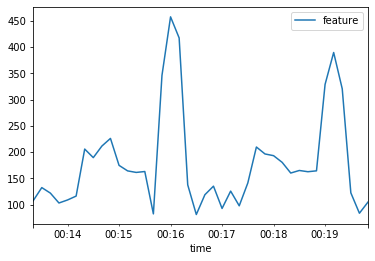

In [222]:
test.plot()

In [218]:
test.to_csv('test_submission')